In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
from Deliverable_4_1.MPCVelControl import MPCVelControl
from Deliverable_4_1.PIControl.PIControl import PIControl
import numpy as np
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.20 > 0.17, 
Simulating time 0.30: 
 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.21 > 0.17, 
Simulating time 0.35: 
 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.20 > 0.17, 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.18 > 0.17, 
Simulating time 0.65: 
 State beta violation: -0.17 < -0.17, 
 State alpha violation: 0.18 > 0.17, 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
 State beta violation: -0.17 < -0.17, 
 State alpha violation: 0.17 > 0.17, 
Simulating time 0.90: 
 State alpha violation: 0.17 > 0.17, 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1

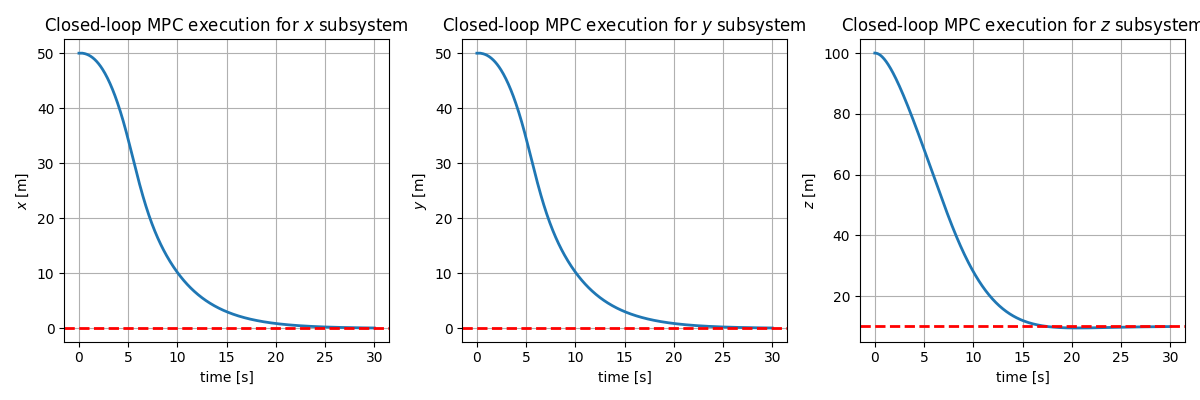

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=599, step=2), IntSlider(value=0…

In [5]:
import matplotlib.pyplot as plt

Ts = 0.05
sim_time = 30
H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 50, 100])  # initial state
pos_target = np.array([0, 0, 10.0])

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
pos_controller = PIControl(pos_target)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(mpc, sim_time, H, x0, pos_control=pos_controller, method="nonlinear")

#Plot Closed-loop
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs = axs.flatten()

#x subsystem
axs[0].plot(t_cl, x_cl[9, :], '-', linewidth=2)
axs[0].axhline(pos_target[0], color='r', linestyle='--', linewidth=2)
axs[0].set_title('Closed-loop MPC execution for $x$ subsystem')
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel(r'$x$ [m]')
axs[0].grid(True)
#y subsystem
axs[1].plot(t_cl, x_cl[10, :], '-', linewidth=2)
axs[1].axhline(pos_target[1], color='r', linestyle='--', linewidth=2)
axs[1].set_title('Closed-loop MPC execution for $y$ subsystem')
axs[1].set_xlabel('time [s]')
axs[1].set_ylabel(r'$y$ [m]')
axs[1].grid(True)
#z subsystem
axs[2].plot(t_cl, x_cl[11, :], '-', linewidth=2)
axs[2].axhline(pos_target[2], color='r', linestyle='--', linewidth=2)
axs[2].set_title('Closed-loop MPC execution for $z$ subsystem')
axs[2].set_xlabel('time [s]')
axs[2].set_ylabel(r'$z$ [m]')
axs[2].grid(True)

plt.tight_layout()
plt.show()

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=ref[:, :-1],
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
);